# Filme basierend auf der Sprache des Films Klassifizieren

Importieren wichtiger Bibliotheken

In [1]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import spacy

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Lade das englische Sprachmodell von spaCy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rawan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rawan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rawan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Filmdaten abrufen und speichern

In [3]:
'''
# TMDb-API-Schlüssel
api_key = '8fd8f41e872ddd873838d1f0f571e31b'

# Basis-URL für die API-Anfragen
base_url = 'https://api.themoviedb.org/3/discover/movie'

# Parameter für die Anfrage
params = {
    'api_key': api_key,
    'language': 'en-US',
    'sort_by': 'popularity.desc',
    'include_adult': 'false',
    'include_video': 'false',
    'page': 1,
    'primary_release_date.gte': '2015-01-01',
    'primary_release_date.lte': '2023-12-31',
    'with_original_language': None
}

# Funktion, um Filme von einer bestimmten Seite abzurufen
def get_movies(page):
    params['page'] = page
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        return response.json().get('results', [])
    else:
        print(f"Fehler beim Abrufen der Seite {page}: {response.status_code}")
        return []

# Filmdaten speichern
movies = []

# Erhöhe die Anzahl der Seiten
total_pages = 100  # Anzahl der Seiten, die man abrufen möchte

# Erweiterte Sprachenliste
languages = {
    'hi': 'Indisch',
    'en': 'Amerikanisch',
    'de': 'Deutsch',
    'fr': 'Französisch',
    'es': 'Spanisch',
    'it': 'Italienisch'
}

# Filme für jede Sprache sammeln
for lang_code, lang_name in languages.items():
    params['with_original_language'] = lang_code
    for page in range(1, total_pages + 1):
        # print(f"Verarbeite Seite {page} für Sprache: {lang_name}")
        movies_on_page = get_movies(page)
        for movie in movies_on_page:
            movies.append({
                'title': movie.get('title'),
                'release_year': movie.get('release_date', '')[:4],
                'language': lang_name,
                'overview': movie.get('overview', ''),
                'vote_average': movie.get('vote_average', 0),
                'vote_count': movie.get('vote_count', 0),
                'popularity': movie.get('popularity', 0),
            })
        time.sleep(0.2)

# Speichern in einer CSV-Datei
df = pd.DataFrame(movies)
df.to_csv('movies_2015_2023.csv', index=False)
#print(f"Gesamtanzahl der Filme: {len(df)}")
''' 

'\n# TMDb-API-Schlüssel\napi_key = \'8fd8f41e872ddd873838d1f0f571e31b\'\n\n# Basis-URL für die API-Anfragen\nbase_url = \'https://api.themoviedb.org/3/discover/movie\'\n\n# Parameter für die Anfrage\nparams = {\n    \'api_key\': api_key,\n    \'language\': \'en-US\',\n    \'sort_by\': \'popularity.desc\',\n    \'include_adult\': \'false\',\n    \'include_video\': \'false\',\n    \'page\': 1,\n    \'primary_release_date.gte\': \'2015-01-01\',\n    \'primary_release_date.lte\': \'2023-12-31\',\n    \'with_original_language\': None\n}\n\n# Funktion, um Filme von einer bestimmten Seite abzurufen\ndef get_movies(page):\n    params[\'page\'] = page\n    response = requests.get(base_url, params=params)\n    if response.status_code == 200:\n        return response.json().get(\'results\', [])\n    else:\n        print(f"Fehler beim Abrufen der Seite {page}: {response.status_code}")\n        return []\n\n# Filmdaten speichern\nmovies = []\n\n# Erhöhe die Anzahl der Seiten\ntotal_pages = 100  # A

In [4]:
# Die Filmdaten Zeigen
# CSV-Datei in pandas DataFrame laden
df = pd.read_csv('movies_2015_2023.csv')

# Zeige die ersten Zeilen an (optional)

df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Tumbbad,2018,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.500,240,60.379
1,Uri: The Surgical Strike,2019,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420,53.110
2,Attack,2022,Indisch,"With the Parliament under siege, India’s first...",6.739,203,52.842
3,Jawan,2023,Indisch,"An emotional journey of a prison warden, drive...",7.200,241,43.381
4,Animal,2023,Indisch,The hardened son of a powerful industrialist r...,6.540,101,37.667
...,...,...,...,...,...,...,...
11995,The first wave - Milan in the time of Covid-19,2020,Italienisch,The choral work of 57 directors and filmmakers...,6.000,1,0.672
11996,Pink for the Masses,2023,Italienisch,NaN,10.000,1,0.671
11997,La fallacia del cecchino texano,2022,Italienisch,NaN,0.000,0,0.671
11998,Wunderkammer: World of Wonder,2019,Italienisch,What are wonders and what does it mean to coll...,8.500,1,0.671


In [5]:
# Anzahl der Filme (Zeilen) ermitteln
print(f"Die Gesamtanzahl der Filme: {len(df)}")


Die Gesamtanzahl der Filme: 12000


In [6]:
# Überprüfe, ob noch NaN-Werte vorhanden sind (optional)
print(df.isna().sum())


title              0
release_year       0
language           0
overview        1512
vote_average       0
vote_count         0
popularity         0
dtype: int64


In [7]:
# df = df['overview'].dropna()
# Entfernt alle Zeilen, bei denen der Wert in der 'overview'-Spalte NaN ist
df['overview'] = df['overview'].dropna()

# Überprüfe, ob noch NaN-Werte vorhanden sind (optional)
print(df.isna().sum())


title              0
release_year       0
language           0
overview        1512
vote_average       0
vote_count         0
popularity         0
dtype: int64


In [8]:
# Anzahl der leeren Zellen (d.h. Zellen mit einem leeren String '') pro Spalte
empty_cells_per_column = (df == '').sum()

print(empty_cells_per_column)


title           0
release_year    0
language        0
overview        0
vote_average    0
vote_count      0
popularity      0
dtype: int64


In [9]:
# Entfernt alle Zeilen, bei denen der Wert in der 'overview'-Spalte entweder NaN oder leer ist
df = df[df['overview'].notna() & df['overview'].str.strip().ne('')]

# Überprüfe, ob noch leere oder NaN-Werte vorhanden sind (optional)
print(df.ne('').sum())


title           10487
release_year    10487
language        10487
overview        10487
vote_average    10487
vote_count      10487
popularity      10487
dtype: int64


In [10]:
# Anzahl der leeren Zellen (d.h. Zellen mit einem leeren String '') pro Spalte
empty_cells_per_column = (df == '').sum()

print(empty_cells_per_column)


title           0
release_year    0
language        0
overview        0
vote_average    0
vote_count      0
popularity      0
dtype: int64


In [11]:
df

,title,release_year,language,overview,vote_average,vote_count,popularity
0,Tumbbad,2018,Indisch,"India, 1918. On the outskirts of Tumbbad, a cu...",7.500,240,60.379
1,Uri: The Surgical Strike,2019,Indisch,Following the roguish terrorist attacks at Uri...,7.067,420,53.110
2,Attack,2022,Indisch,"With the Parliament under siege, India’s first...",6.739,203,52.842
3,Jawan,2023,Indisch,"An emotional journey of a prison warden, drive...",7.200,241,43.381
4,Animal,2023,Indisch,The hardened son of a powerful industrialist r...,6.540,101,37.667
...,...,...,...,...,...,...,...
11992,A volte nel buio (Sometimes in the dark),2021,Italienisch,A remote village in the mountains. A community...,4.000,2,0.673
11993,Departures,2018,Italienisch,"Ludovico accepted the last choice of his wife,...",9.500,2,0.673
11994,The Coleopteran,2021,Italienisch,A disillusioned priest must deal with the disa...,0.000,0,0.672
11995,The first wave - Milan in the time of Covid-19,2020,Italienisch,The choral work of 57 directors and filmmakers...,6.000,1,0.672


In [12]:
# Anzahl der Filme (Zeilen) ermitteln
print(f"Die Gesamtanzahl der Filme: {len(df)}")

Die Gesamtanzahl der Filme: 10487


## EDA

In [13]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,release_year,vote_average,vote_count,popularity
count,10487.000000,10487.000000,10487.000000,10487.000000
mean,2019.614666,5.374756,515.165920,10.599459
std,2.678847,2.525562,1858.020471,18.907564
min,2015.000000,0.000000,0.000000,0.119000
25%,2017.000000,5.000000,2.000000,1.881500
50%,2020.000000,6.100000,24.000000,4.019000
75%,2022.000000,6.900000,159.000000,10.723000
max,2023.000000,10.000000,30749.000000,353.267000


In [14]:
# Anzahl der Filme in jeder Sprache
language_counts = df['language'].value_counts()

# Ausgabe der Anzahl der Filme pro Sprache
print(language_counts)


language
Amerikanisch    2000
Indisch         1922
Spanisch        1785
Französisch     1784
Deutsch         1552
Italienisch     1444
Name: count, dtype: int64


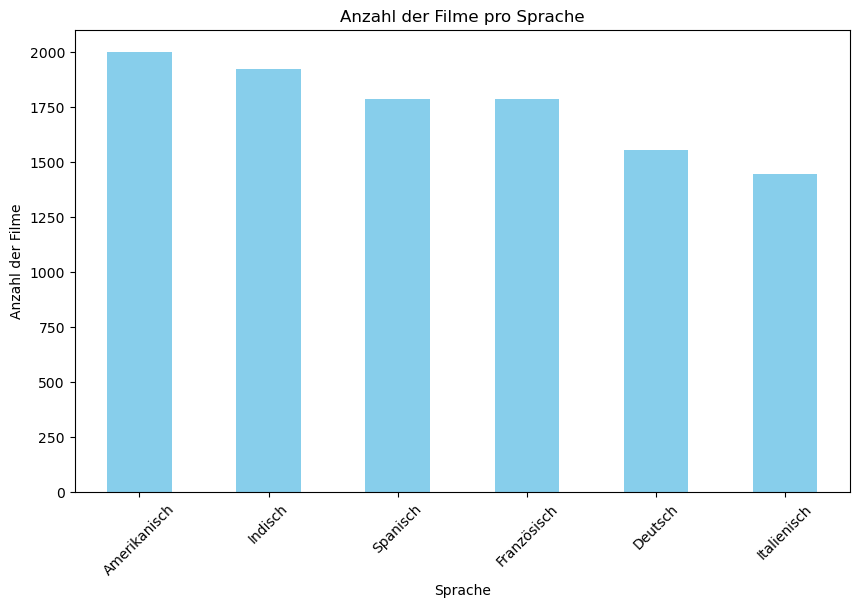

In [15]:

# Zähle die Anzahl der Filme pro Sprache
language_counts = df['language'].value_counts()

# Visualisiere die Anzahl der Filme pro Sprache als Balkendiagramm
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Anzahl der Filme pro Sprache')
plt.xlabel('Sprache')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.show()


C:\Users\rawan\AppData\Local\Temp\ipykernel_12684\201898807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=df, palette='viridis')


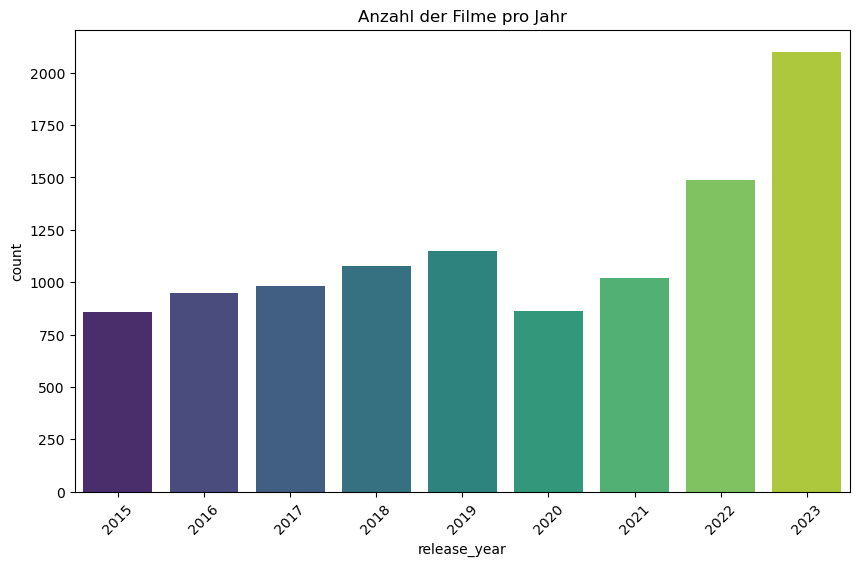

In [16]:
# Anzahl der Filme pro Jahr (Trend)
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=df, palette='viridis')
plt.title('Anzahl der Filme pro Jahr')
plt.xticks(rotation=45)
plt.show()

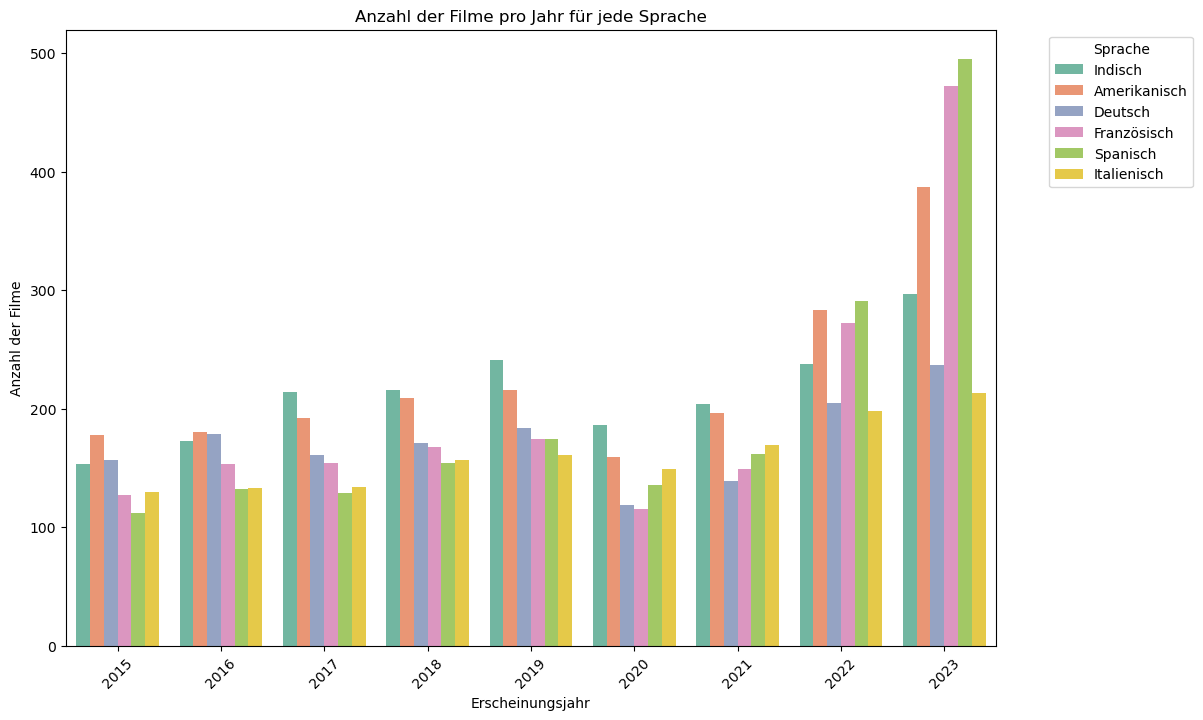

In [17]:
# Anzahl der Filme pro Jahr für jede Sprache plotten
plt.figure(figsize=(12, 8))

# Wir verwenden eine Palette für die Farben und plotten die Filme pro Jahr und Sprache
sns.countplot(x='release_year', hue='language', data=df, palette='Set2')

plt.title('Anzahl der Filme pro Jahr für jede Sprache')
plt.xlabel('Erscheinungsjahr')
plt.ylabel('Anzahl der Filme')
plt.xticks(rotation=45)
plt.legend(title='Sprache', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Preprocessing

In [18]:

def preprocess_text(text):
    # Kleinbuchstaben umwandeln
    text = text.lower()
    # Entferne Sonderzeichen
    text = re.sub(r'\W', ' ', text)
    # Tokenisierung mit spaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Preprocessing anwenden auf die "overview"-Spalte
df['clean_overview'] = df['overview'].apply(preprocess_text)

# 3. Vektorisierung mit TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_overview'])

# 4. Labels (die Sprache des Films)
y = df['language']

# 5. Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



C:\Users\rawan\AppData\Local\Temp\ipykernel_12684\1955189089.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_overview'] = df['overview'].apply(preprocess_text)


In [19]:
df['clean_overview']

0        india   1918   outskirt tumbbad   cursed villa...
1        follow roguish terrorist attack uri army base ...
2        parliament siege   india s super soldier arjun...
3        emotional journey prison warden   drive person...
4        harden son powerful industrialist return home ...
                               ...                        
11992    remote village mountain   community affect mys...
11993    ludovico accept choice wife   love   find cour...
11994    disillusioned priest deal disappearance pin in...
11995    choral work 57 director filmmaker tell story m...
11998    wonder mean collect   wunderkammer    know cab...
Name: clean_overview, Length: 10487, dtype: object

## Feature Engineering

## Models

Readme, envirenment, code kommentieren